In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pandas import Series, DataFrame

In [ ]:
# Label Encoder, linear reression and Random forest was applied initially where we couldn't get accurate values.
# Here, from OLS method we observed very high p value for colns hence we had to remove them. 
# after this step, coln with p value less than 0.05 were taken into consideration

In [ ]:
# we have implemented EDA and feature selections. We had to drop cols because of NAN values.
#We are not treating outliers as we are using regression methods that can handle outliers.


df = pd.read_csv("new_train_dataset_regression_modelling.csv")
df.columns

Index(['channelGrouping', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.mobileDeviceModel', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'trafficSource.medium', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source'],
      dtype='object')

In [ ]:
df.shape

(11515, 18)

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [ ]:
num_columns = num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime"]#, 'totals.bounces',  'totals.newVisits'] 
cat_columns = ["channelGrouping","device.browser","device.operatingSystem","device.deviceCategory","geoNetwork.continent","geoNetwork.subContinent","geoNetwork.country","geoNetwork.region","geoNetwork.metro","geoNetwork.city","trafficSource.campaign","trafficSource.source","trafficSource.medium"]



In [ ]:
#labelencoder.fit_transform

In [ ]:
#Drop independent categorical column 
dataset.columns = dataset.columns.str.strip()
dataDropDF=dataset.drop(["geoNetwork.subContinent","geoNetwork.country","geoNetwork.region","geoNetwork.metro","geoNetwork.city"],axis=1)

In [ ]:
#Check null column 
dataDropDF.isnull().sum()

channelGrouping              0
device.browser               0
device.operatingSystem       0
device.isMobile              0
device.mobileDeviceModel     0
device.deviceCategory        0
geoNetwork.continent         0
trafficSource.medium         0
totals.hits                  0
totals.pageviews             0
totals.transactionRevenue    0
trafficSource.campaign       0
trafficSource.source         0
dtype: int64

<AxesSubplot:>

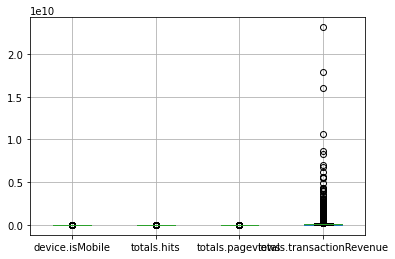

In [ ]:
#outliers checking 
dataDropDF.boxplot()

In [ ]:
cat_columns=['channelGrouping', 'device.browser','trafficSource.campaign']
#implement one hot encoding 
one_hot_enc = pd.get_dummies(dataDropDF,columns=cat_columns,drop_first=True)


one_hot_enc.columns

Index(['device.operatingSystem', 'device.isMobile', 'device.mobileDeviceModel',
       'device.deviceCategory', 'geoNetwork.continent', 'trafficSource.medium',
       'totals.hits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.source', 'channelGrouping_Affiliates',
       'channelGrouping_Direct', 'channelGrouping_Display',
       'channelGrouping_Organic Search', 'channelGrouping_Paid Search',
       'channelGrouping_Referral', 'channelGrouping_Social',
       'device.browser_Android Webview', 'device.browser_Chrome',
       'device.browser_Edge', 'device.browser_Firefox',
       'device.browser_Internet Explorer', 'device.browser_Opera',
       'device.browser_Safari', 'device.browser_Safari (in-app)',
       'trafficSource.campaign_AW - Accessories',
       'trafficSource.campaign_AW - Apparel',
       'trafficSource.campaign_AW - Dynamic Search Ads Whole Site',
       'trafficSource.campaign_Data Share Promo',
       'trafficSource.campaign_Retail (DO NOT 

In [ ]:
corr= one_hot_enc.corr()
corr

,device.isMobile,totals.hits,totals.pageviews,totals.transactionRevenue,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,...,device.browser_Internet Explorer,device.browser_Opera,device.browser_Safari,device.browser_Safari (in-app),trafficSource.campaign_AW - Accessories,trafficSource.campaign_AW - Apparel,trafficSource.campaign_AW - Dynamic Search Ads Whole Site,trafficSource.campaign_Data Share Promo,trafficSource.campaign_Retail (DO NOT EDIT owners nophakun and tianyu),trafficSource.campaign_test-liyuhz
device.isMobile,1.000000,-0.042862,-0.032426,-0.052623,0.013155,0.059311,-0.009910,0.211357,0.106096,-0.279247,...,0.020027,-0.006498,0.440171,0.103604,0.067939,-0.002905,0.080314,0.013155,0.029894,-0.002905
totals.hits,-0.042862,1.000000,0.980058,0.141973,0.000773,-0.019764,0.002835,0.032709,-0.002882,-0.016171,...,-0.026249,0.004218,-0.034811,-0.022879,-0.013922,-0.005011,0.005081,0.000773,0.005150,0.001455
totals.pageviews,-0.032426,0.980058,1.000000,0.128644,-0.000425,-0.018206,0.002864,0.042108,-0.001228,-0.029130,...,-0.028070,0.006014,-0.030838,-0.021304,-0.013883,-0.004860,0.007559,-0.000425,0.004577,-0.003573
totals.transactionRevenue,-0.052623,0.141973,0.128644,1.000000,-0.004203,0.082034,0.104177,-0.056488,-0.018674,-0.022886,...,-0.012650,-0.004216,-0.040029,-0.008713,-0.003611,-0.001163,-0.018851,-0.004203,-0.002303,-0.001907
channelGrouping_Affiliates,0.013155,0.000773,-0.000425,-0.004203,1.000000,-0.012985,-0.003125,-0.018247,-0.005757,-0.025877,...,-0.002734,-0.000583,0.004827,-0.000903,-0.002989,-0.000261,-0.004751,1.000000,-0.000261,-0.000261
channelGrouping_Direct,0.059311,-0.019764,-0.018206,0.082034,-0.012985,1.000000,-0.051879,-0.302909,-0.095562,-0.429572,...,0.029752,0.012150,0.006044,0.055473,-0.049612,-0.004327,-0.078874,-0.012985,-0.004327,-0.004327
channelGrouping_Display,-0.009910,0.002835,0.002864,0.104177,-0.003125,-0.051879,1.000000,-0.072901,-0.022999,-0.103385,...,-0.010923,-0.002329,-0.017594,-0.003609,-0.011940,-0.001041,-0.018983,-0.003125,-0.001041,-0.001041
channelGrouping_Organic Search,0.211357,0.032709,0.042108,-0.056488,-0.018247,-0.302909,-0.072901,1.000000,-0.134285,-0.603643,...,0.079285,0.004620,0.231922,-0.021072,-0.069716,-0.006080,-0.110835,-0.018247,-0.006080,-0.006080
channelGrouping_Paid Search,0.106096,-0.002882,-0.001228,-0.018674,-0.005757,-0.095562,-0.022999,-0.134285,1.000000,-0.190438,...,-0.011037,0.016820,0.074028,-0.006648,0.519164,0.045278,0.825366,-0.005757,0.045278,0.045278
channelGrouping_Referral,-0.279247,-0.016171,-0.029130,-0.022886,-0.025877,-0.429572,-0.103385,-0.603643,-0.190438,1.000000,...,-0.088649,-0.019284,-0.245242,-0.029884,-0.098868,-0.008623,-0.157181,-0.025877,-0.008623,-0.008623


In [ ]:
#DROP totals.pageviews as it has more correlation with totals.hits column.
#DROP device.isMobile as its negative correlated with all others

one_hot_enc1=one_hot_enc.drop(['totals.pageviews'],axis=1)
one_hot_enc1.columns

Index(['device.operatingSystem', 'device.isMobile', 'device.mobileDeviceModel',
       'device.deviceCategory', 'geoNetwork.continent', 'trafficSource.medium',
       'totals.hits', 'totals.transactionRevenue', 'trafficSource.source',
       'channelGrouping_Affiliates', 'channelGrouping_Direct',
       'channelGrouping_Display', 'channelGrouping_Organic Search',
       'channelGrouping_Paid Search', 'channelGrouping_Referral',
       'channelGrouping_Social', 'device.browser_Android Webview',
       'device.browser_Chrome', 'device.browser_Edge',
       'device.browser_Firefox', 'device.browser_Internet Explorer',
       'device.browser_Opera', 'device.browser_Safari',
       'device.browser_Safari (in-app)',
       'trafficSource.campaign_AW - Accessories',
       'trafficSource.campaign_AW - Apparel',
       'trafficSource.campaign_AW - Dynamic Search Ads Whole Site',
       'trafficSource.campaign_Data Share Promo',
       'trafficSource.campaign_Retail (DO NOT EDIT owners nophakun

In [ ]:
one_hot_enc1=one_hot_enc1.drop(['device.operatingSystem','device.isMobile','device.mobileDeviceModel','device.deviceCategory',
                              'geoNetwork.continent','trafficSource.medium','trafficSource.source'],axis=1)

In [ ]:
one_hot_enc1.head()


,totals.hits,totals.transactionRevenue,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.browser_Android Webview,...,device.browser_Internet Explorer,device.browser_Opera,device.browser_Safari,device.browser_Safari (in-app),trafficSource.campaign_AW - Accessories,trafficSource.campaign_AW - Apparel,trafficSource.campaign_AW - Dynamic Search Ads Whole Site,trafficSource.campaign_Data Share Promo,trafficSource.campaign_Retail (DO NOT EDIT owners nophakun and tianyu),trafficSource.campaign_test-liyuhz
0,11,37860000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,306670000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,68030000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,26250000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,574150000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=one_hot_enc1.drop('totals.transactionRevenue',axis=1)
#y=one_hot_enc1['totals.transactionRevenue']

one_hot_enc1["totals.transactionRevenue"] = np.log1p(one_hot_enc1["totals.transactionRevenue"].astype(float))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(X,one_hot_enc1["totals.transactionRevenue"],test_size = 0.2,random_state=10)

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(train_x)

# transform training data
X_train_norm = norm.transform(train_x)

# transform testing dataabs
X_test_norm = norm.transform(valid_x)

In [ ]:
!pip install lightgm

ERROR: Could not find a version that satisfies the requirement lightgbm (from versions: none)
ERROR: No matching distribution found for lightgbm



Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [ ]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : "mae",
              "num_leaves" : 50, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(X_train_norm, label=train_y)
lgb_val = lgb.Dataset(X_test_norm, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 700, valid_sets=[lgb_val], early_stopping_rounds=150, verbose_eval=20)


ModuleNotFoundError: No module named 'lightgbm'